## Galfit Results and Plots

In this notebook I create all the plots that require inputs from the Galfit  run / calculation of parameters based on the Galfit results.

I'm gonna write everything in a way that it will be very easy to re-run the notebook with updated Galfit catalogs.

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Define a function that creates jointplots

In [2]:
from matplotlib import gridspec
from scipy.stats import gaussian_kde

def jointPlot(data, dims,cols,bins,kde=False,**kwargs):
    '''
    data = our dataset - dimensions (:,2) or (:,4) depending on the dimension
    dims = 2 or 4 - 2 in case we have a joint plot of one type of data - 4 if we have two types of data
    cols = colors (1 or 2)
    '''
    # ============================================================
    # ============================================================
    # Define the max and mins of the first dataset
    x_min_1, x_max_1 = data[:,0].min(),data[:,0].max()
    y_min_1, y_max_1 = data[:,1].min(),data[:,1].max()
    
    # Now if dims = 4, find the min and max of the second dataset as well
    if (dims==4):
        x_min_2, x_max_2 = data[:,2].min(),data[:,2].max()
        y_min_2, y_max_2 = data[:,3].min(),data[:,3].max()
    
    # ============================================================
    # ============================================================
    # Define grid for subplots
    gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.2, width_ratios=[4, 1], height_ratios = [1, 4])
    
    # ============================================================
    # ============================================================
    #Create scatter plot
    fig = plt.figure(figsize=(5.5,5.5),facecolor='white')
    ax = plt.subplot(gs[1, 0],frameon = True)
    cax = ax.scatter(data[:,0], data[:,1],rasterized=True, color=cols[0], s=0.5, alpha=.6)
    # Now in case dims=4, add one more scatter plot
    if (dims==4):
        cax = ax.scatter(data[:,2], data[:,3], rasterized=True,color=cols[1], s=0.5, alpha=.6)
   
    ax.grid(ls='--', axis='both' ,alpha=0.6)
    
    ax.set_xlabel(kwargs['xlabel'],fontsize=11)
    ax.set_ylabel(kwargs['ylabel'],fontsize=11)
    # ===============================================================
    # ===============================================================
    # Lower and upper limits in the x and y directions
    x_low = kwargs['xlow']
    x_up = kwargs['xup']
    y_low = kwargs['ylow']
    y_up = kwargs['yup']
    # ===============================================================
    # ===============================================================
    #Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], sharey=ax, frameon = True, xticks = [],ylim=(y_low,y_up)) 
    axr.hist(data[:,1],bins=bins, color = cols[0],alpha=0.6, orientation = 'horizontal', normed = True)
    # In case dims = 4, add one more historgram
    if (dims==4):
        axr.hist(data[:,3],bins=bins, color = cols[1],alpha=0.6, orientation = 'horizontal', normed = True)
        
    
    axr.grid(ls='--', axis='both' ,alpha=0.6)
    
    
    # ===============================================================
    #Create X-marginal(top)
    axt = plt.subplot(gs[0,0], sharex=ax,frameon = True, yticks=[],xlim=(x_low,x_up))
    axt.hist(data[:,0],bins=bins, color = cols[0],alpha=0.6, normed = True)
    # In case dims = 4, add one more histogram
    if (dims==4):
        axt.hist(data[:,2],bins=bins, color = cols[1],alpha=0.6, normed = True)
        
    axt.grid(ls='--', axis='both' ,alpha=0.6)
    
    #Bring the marginals closer to the scatter plot
    fig.tight_layout(pad = 0.0)

    if kde:
        kdex_1=gaussian_kde(data[:,0])
        kdey_1=gaussian_kde(data[:,1])
        x_1= np.linspace(x_min_1,x_max_1,100)
        y_1= np.linspace(y_min_1,y_max_1,100)
        dx_1=kdex_1(x_1)
        dy_1=kdey_1(y_1)
        axr.plot(dy_1,y_1,color='k',linewidth=1)
        axt.plot(x_1,dx_1,color='k', linewidth=1)
        
        # And in case dims = 4, we have more kdes
        if (dims==4):
            kdex_2=gaussian_kde(data[:,2])
            kdey_2=gaussian_kde(data[:,3])
            x_2= np.linspace(x_min_2,x_max_2,100)
            y_2= np.linspace(y_min_2,y_max_2,100)
            dx_2=kdex_2(x_2)
            dy_2=kdey_2(y_2)
            axr.plot(dy_2,y_2,color='black', ls='--')
            axt.plot(x_2,dx_2,color='black', ls='--')
        
    return ax,axt,axr
    

### Import the catalog with the Galfit results now

In [29]:
from astropy.io import fits
Galfit_res = fits.open('y3_gold_2_2_lsbg_galfit_v1.0.fits')
#Galfit_res[1].header.keys

In [30]:
coadd_object_id = Galfit_res[1].data["COADD_OBJECT_ID"]
object_num = Galfit_res[1].data["OBJECT_NUMBER"] #what is this?
# Coordinates
RA = Galfit_res[1].data["RA"]
DEC = Galfit_res[1].data["DEC"]
# A, B image
A_IMAGE = Galfit_res[1].data["A_IMAGE"]
B_IMAGE = Galfit_res[1].data["B_IMAGE"]
# Effective radius 
R_eff = 0.263*Galfit_res[1].data["RE"]
R_eff_err = 0.263*Galfit_res[1].data["RE_ERR"]
# Sersic index
n_ser = Galfit_res[1].data["N"]
n_ser_err = Galfit_res[1].data["N_ERR"]
# Magnitudes
mag_g = Galfit_res[1].data["MAG_G"]
mag_r = Galfit_res[1].data["MAG_R"]
mag_i = Galfit_res[1].data["MAG_I"]
# Errors on magnitudes 
mag_g_err = Galfit_res[1].data["MAG_ERR_G"]
mag_r_err = Galfit_res[1].data["MAG_ERR_R"]
mag_i_err = Galfit_res[1].data["MAG_ERR_I"]

## Part I: LSBG properties

In this part I will make plots and some calculations describing the properties of our LSBG sample.
(Section 5 of our paper).


### Color-color plot

Let's start with the color-color plot in the $g-i$ - $g-r$ color space.

In [34]:
# Define the colors here
col_g_i = mag_g - mag_i
col_g_r = mag_g - mag_r
col_i_r = mag_i - mag_r

In [35]:
# Calculate and print the median of the g-i color
med_g_i = np.median(col_g_i)
print(med_g_i)

0.6518593


In [52]:
data = np.zeros((len(col_g_i[col_g_i>-1.0]),2))
data[:,1] = col_g_r[col_g_i>-1.0];data[:,0] = col_g_i[col_g_i>-1.0]

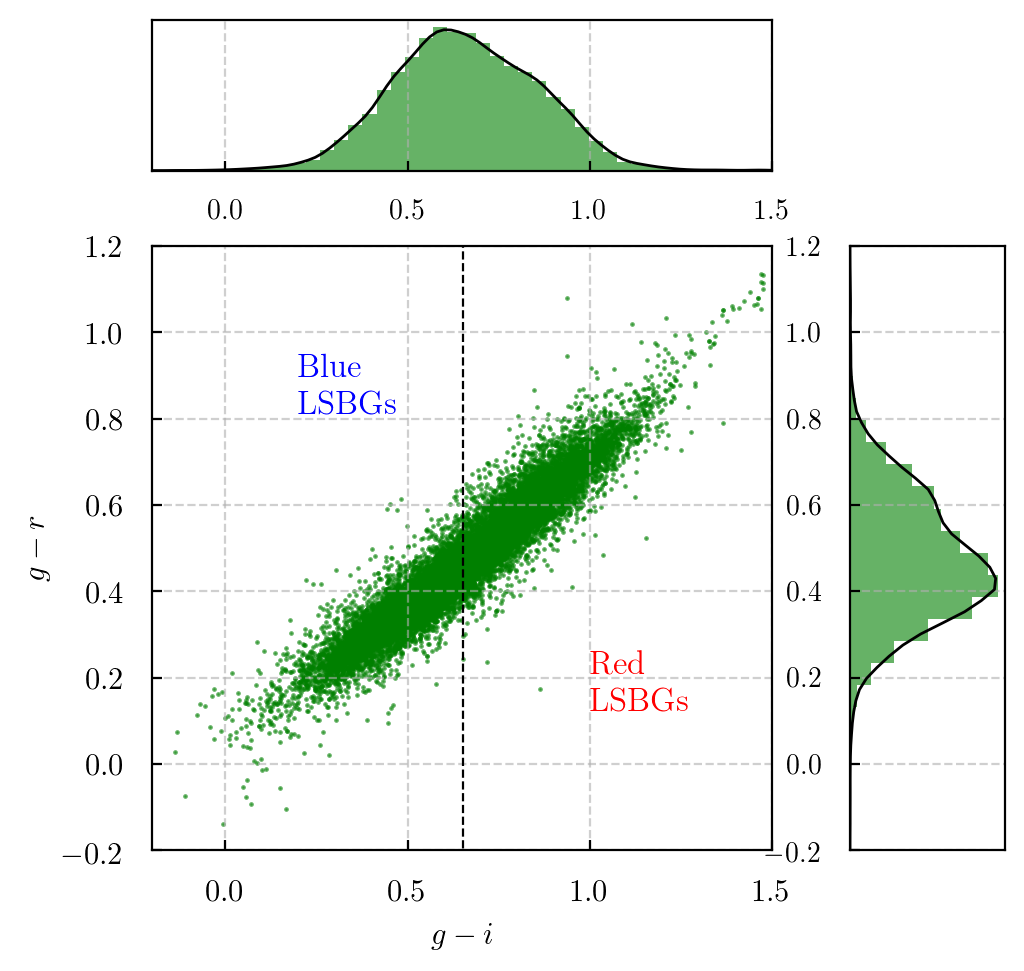

In [55]:
#import seaborn as sns
#sns.set()
# Return ax object for extras
ax,axt,axr = jointPlot(data, dims=2,cols=['g'],bins=50,kde=True,xlabel='$g-i$', ylabel='$g-r$', xlow=-0.2,xup=1.5,ylow=-0.2,yup=1.2)

ax.vlines(med_g_i,-0.25,1.25, color='k', linewidth=0.8,linestyle='--')
ax.text(0.2,0.81, 'Blue \n LSBGs', color='blue',fontsize=12)
ax.text(1.0,0.12, 'Red \n LSBGs', color='red',fontsize=12)

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('Color_color.pdf', dpi=100)
plt.show()

#### Calculate median of the red and blue galaxy populations

In [58]:
med_red = np.median(col_g_i[col_g_i>med_g_i])
med_blue = np.median(col_g_i[col_g_i<med_g_i])

print('Median of the red population:')
print(med_red)
print('Median of the blue population')
print(med_blue)

Median of the red population:
0.79852486
Median of the blue population
0.522768


###  Mean surface brightness - radius relationship

Here I present the relationship between the mean surface brightness and effective radius.

The mean surface brightness can be calculated from the effective radius and the magnitude as:

\begin{equation}
\left\langle \mu \right\rangle_{eff} = m + 2.5\log (2\pi R_{eff}^2)
\end{equation}

where $m$ the apparent magnitude in the band under consideration.

In [75]:
mu_mean_g = mag_g + 2.5*np.log10(2.0*np.pi*(R_eff**2.0))

# Mean brightness - split in red and blue
mu_mean_g_red = mu_mean_g[(mu_mean_g>21)&(col_g_i>med_g_i)]
mu_mean_g_blue = mu_mean_g[(mu_mean_g>21)&(col_g_i<med_g_i)]


# Effective radius - split in red blue
r_eff_red = R_eff[(mu_mean_g>21)&(col_g_i>med_g_i)]
r_eff_blue = R_eff[(mu_mean_g>21)&(col_g_i<med_g_i)]


# Create a "dataset" compatible to the jointPlot function
dataset = np.zeros((len(mu_mean_g_red),4))
dataset[:,0] = mu_mean_g_blue;dataset[:,1] = r_eff_blue
dataset[:,2] = mu_mean_g_red;dataset[:,3] = r_eff_red

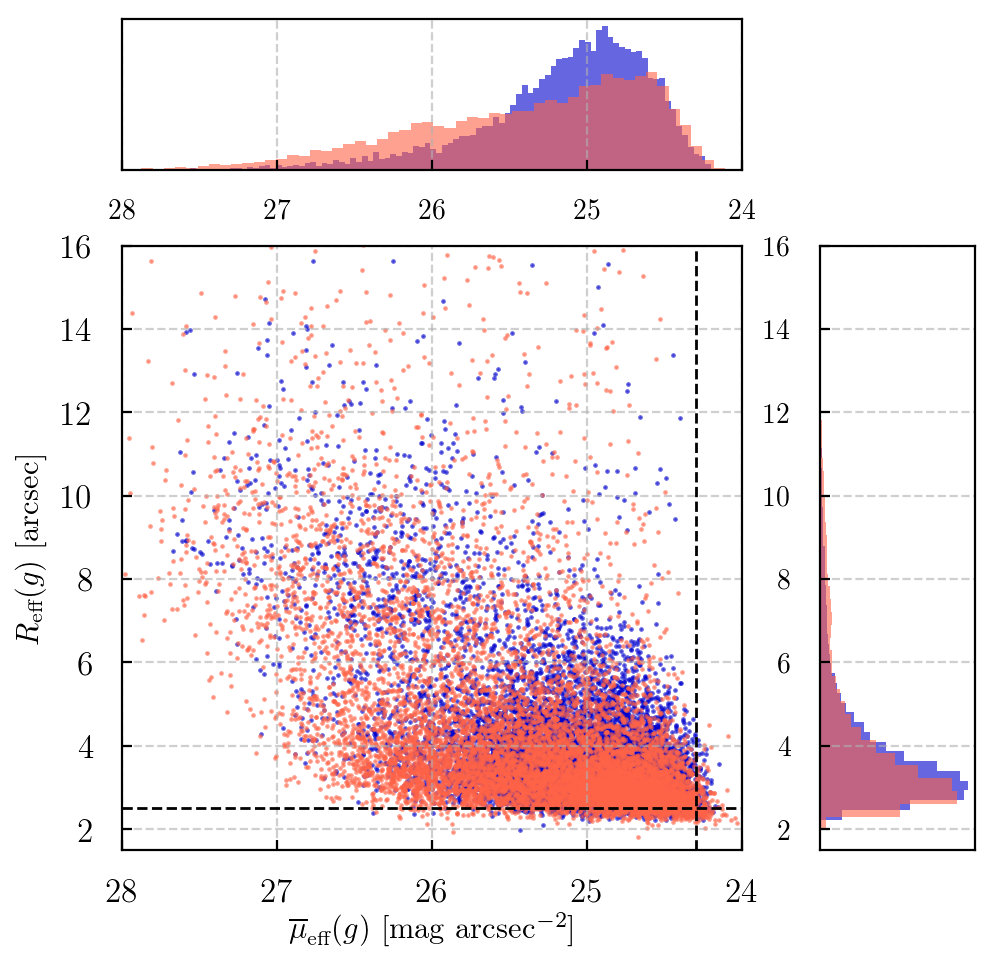

In [78]:
xlabel = '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)$ [mag arcsec$^{-2}$]'
#ylabel = '$r_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(dataset, dims=4,cols=['mediumblue','tomato'],bins=100,kde=False,xlabel=xlabel, ylabel=ylabel, xlow=28,xup=24,ylow=1.5,yup=16)
ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_xticks([28,27,26,25,24])

plt.savefig('Eff_rad_surf_bright.pdf', dpi=100)
plt.show()

In [79]:
print(np.median(r_eff_blue))
print(np.median(r_eff_red))

perc = [50,60,80,90]
perc_blue = np.percentile(r_eff_blue, perc)
perc_red = np.percentile(r_eff_red, perc)

print(perc_blue)
print(perc_red)

3.4466703
3.4643588
[3.44667029 3.68910956 4.6384697  5.9957633 ]
[3.46435881 3.81123352 5.33268642 7.55048513]


Calculate 16th, 50th and 84th percentiles in  μeffμeff 

In [80]:
perc = [16,50,84]

# Calculate for the blue galaxies
perc_blue = np.percentile(mu_mean_g_blue, perc)

# Calculate for the red galaxies
perc_red = np.percentile(mu_mean_g_red, perc)

# Now print them 
print('Percentiles for blue galaxies (16,50,68):')
print(perc_blue)
print('Percentiles for red galaxies (16,50,68):')
print(perc_red)

Percentiles for blue galaxies (16,50,68):
[24.64463081 25.0423336  25.64602089]
Percentiles for red galaxies (16,50,68):
[24.6233345  25.2208786  26.18023834]


## Part II: Spatial Distribution plots

In [82]:
import skymap as smap
from skymap import DESSkymap

In [84]:
# Separate in red and blue galaxies
ra_red = RA[col_g_i>med_g_i]
dec_red = DEC[col_g_i>med_g_i]
# ===================================================
ra_blue = RA[col_g_i<med_g_i]
dec_blue = DEC[col_g_i<med_g_i]

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


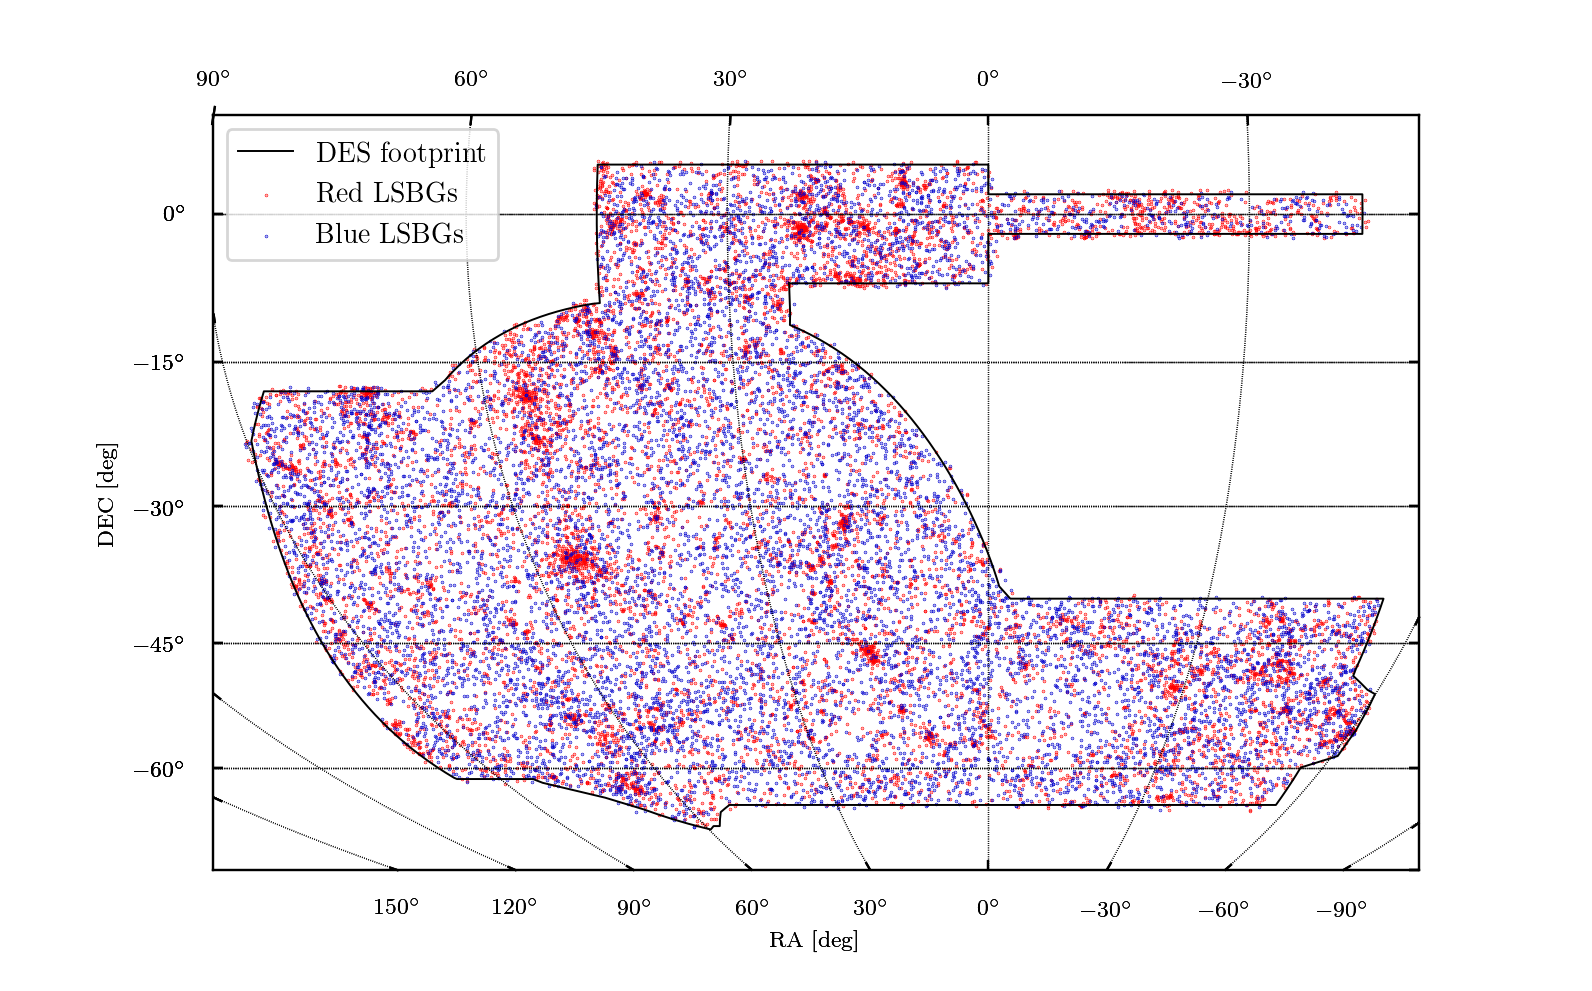

In [93]:
plt.figure(figsize = (8.0,5.0))
smap = DESSkymap()

#smap.scatter(ra, dec, c='r', s=0.05,latlon=True, label="LSBGs")
smap.scatter(ra_red, dec_red, c='r',rasterized=True, s=0.05,latlon=True, label="Red LSBGs")
smap.scatter(ra_blue, dec_blue, c='mediumblue', rasterized=True, s=0.05, latlon=True, label="Blue LSBGs")
smap.draw_des(color='k',linewidth=0.7,label='DES footprint')

plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("DEC [deg]", fontsize=20)


plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('Footprint.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
#plt.savefig('Reds.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
#plt.savefig('Blues.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


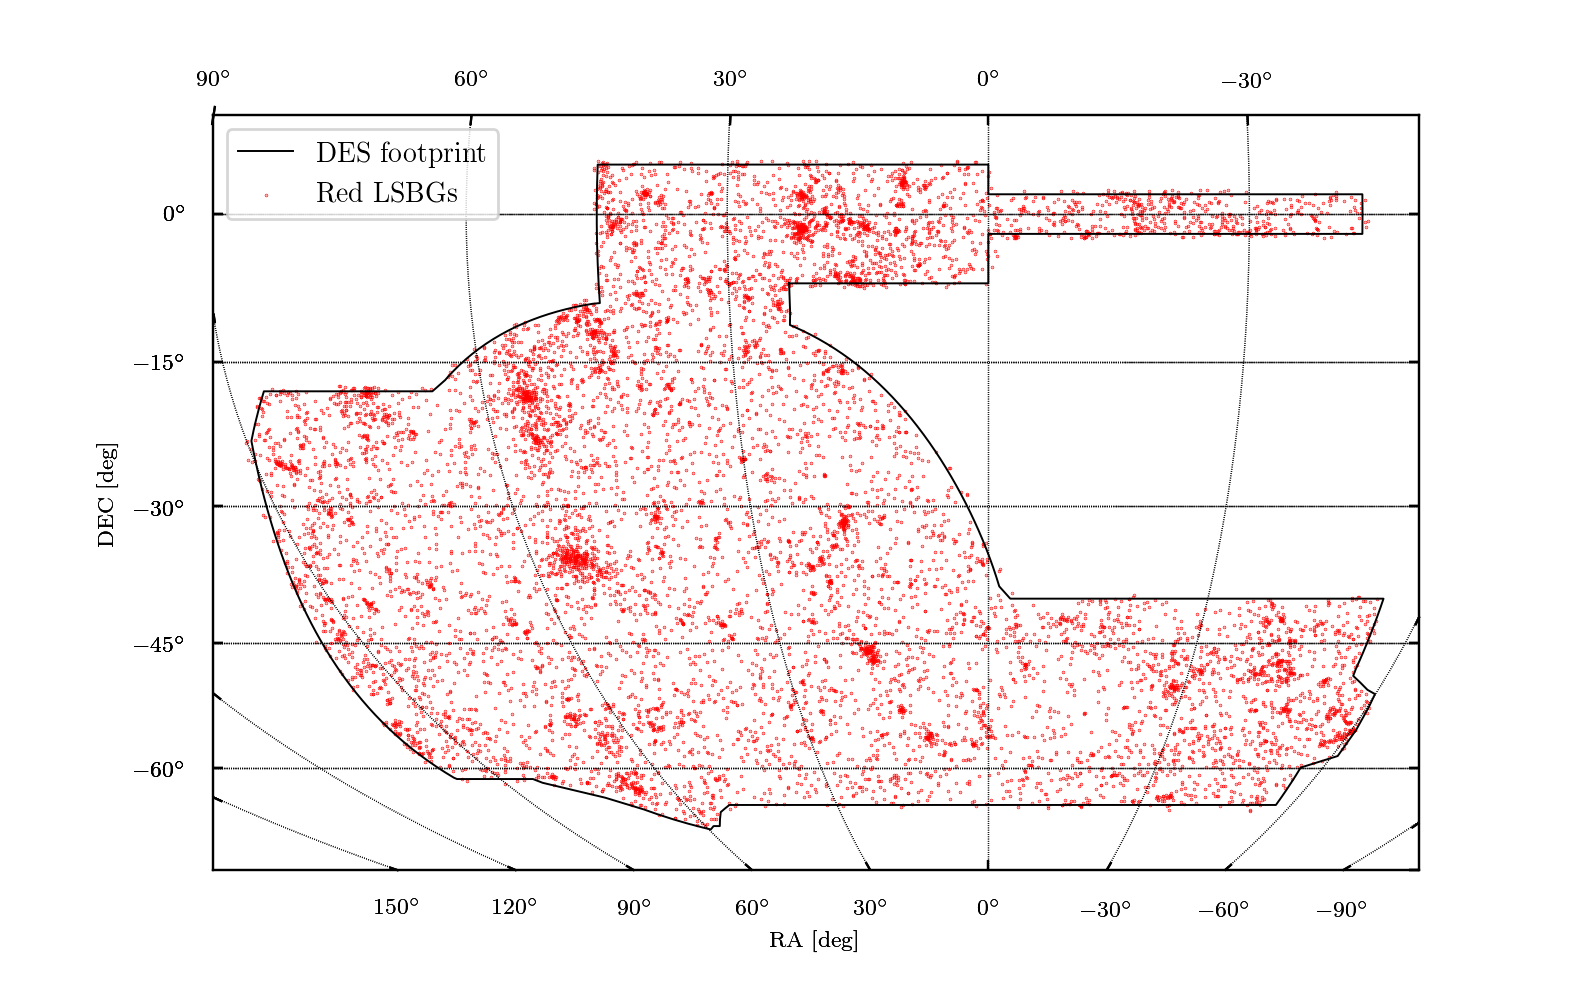

In [92]:
plt.figure(figsize = (8.0,5.0))
smap = DESSkymap()

#smap.scatter(ra, dec, c='r', s=0.05,latlon=True, label="LSBGs")
smap.scatter(ra_red, dec_red, c='r',rasterized=True, s=0.05,latlon=True, label="Red LSBGs")
#smap.scatter(ra_blue, dec_blue, c='mediumblue', rasterized=True, s=0.05, latlon=True, label="Blue LSBGs")
smap.draw_des(color='k',linewidth=0.7,label='DES footprint')

plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("DEC [deg]", fontsize=20)


plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('Reds.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


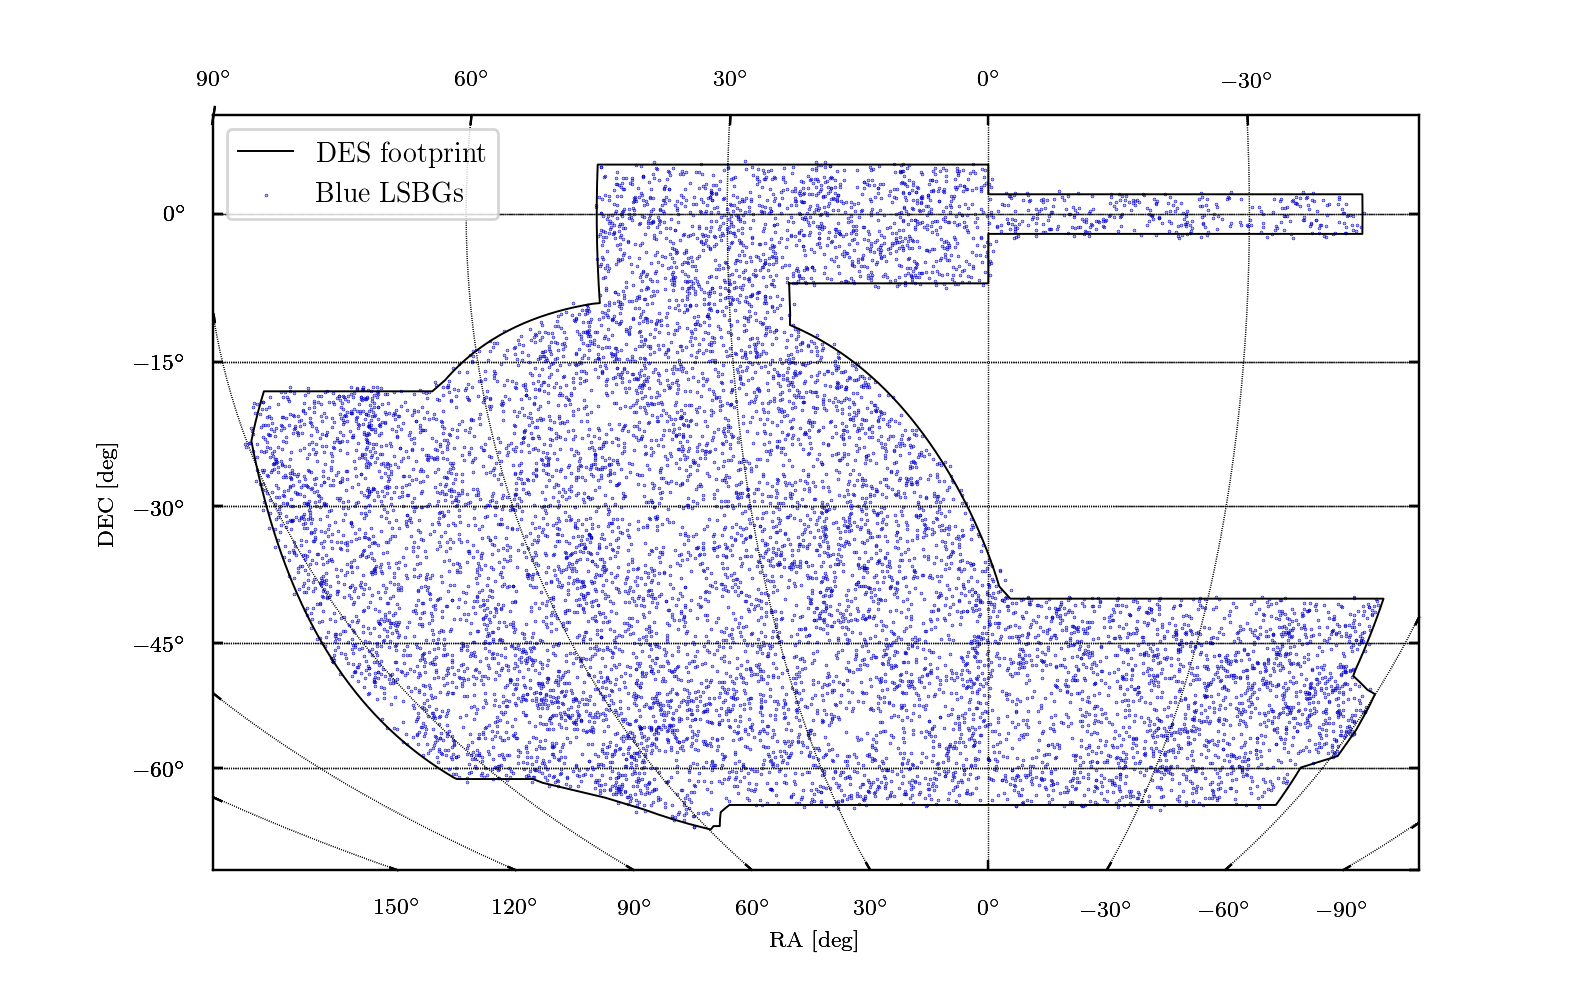

In [91]:
plt.figure(figsize = (8.0,5.0))
smap = DESSkymap()

#smap.scatter(ra, dec, c='r', s=0.05,latlon=True, label="LSBGs")
#smap.scatter(ra_red, dec_red, c='r',rasterized=True, s=0.05,latlon=True, label="Red LSBGs")
smap.scatter(ra_blue, dec_blue, c='mediumblue', rasterized=True, s=0.05, latlon=True, label="Blue LSBGs")
smap.draw_des(color='k',linewidth=0.7,label='DES footprint')

plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("DEC [deg]", fontsize=20)


plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('Blues.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

## Part III: Auto-correlation functions of the red/blue sub-samples

In [95]:
# First import some things we are gonna need
import treecorr
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord

#### Write a function that calculates Jackknife errors, given a data catalog and a random catalog

In [97]:
def Jackknife(ra_dat, dec_dat, ra_rand, dec_rand, N_samples):
    """
    Inputs
    ------------------------------------------
    ra_dat: the ra of the data catalog
    dec_dat: the dec of the data catalog
     
    ra_rand: the ra of the random catalog
    dec_rand: the dac of the random catalog
    
    Outputs
    ------------------------------------------
    Errors in the two-point calculation across different scales
    """
    
    # First of all create array to store the results of the evaluations of 
    # the two point correlation functions
    Xi_vect = np.zeros([N_samples,20]) 
    
    #Create array with length equal to the length of the sample and entries 0,1,...,len(sample)
    len_smpl = len(ra_dat) #length of the sample
    
    A = np.arange(len_smpl)
    #Create array where you randomly redistribute these 
    np.random.shuffle(A)
    
    #randomize the distribution of the ra, dec vectors of the data
    ra_dat_rn = ra_dat[A]
    dec_dat_rn = dec_dat[A]
    
    # Batch size
    batch = int(len_smpl/N_samples)
    
    # =====================================================================
    # =====================================================================
    
    # Let's make a catalog for the randoms
    rand = treecorr.Catalog(ra=ra_rand, dec=dec_rand, ra_units='radians', dec_units='radians')
    rr = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
    rr.process(rand)
    
    # =====================================================================
    # =====================================================================
    #Populate the Xi_vect
    for i in range(N_samples):
        # Points to keep
        init = i*batch #Initial points not to keep
        fin = (i+1)*batch #final points not to keep
        
        # Keep data where you have excluded one batch 
        ra_dat_loc = np.concatenate((ra_dat_rn[:init],ra_dat_rn[fin:]))
        dec_dat_loc = np.concatenate((dec_dat_rn[:init],dec_dat_rn[fin:]))
        
        # Create catalog using the above data 
        cat_dat_loc = treecorr.Catalog(ra=ra_dat_loc, dec=dec_dat_loc, ra_units='deg', dec_units='deg')
        dd_loc = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
        dd_loc.process(cat_dat_loc)
        
        #data - random catalog
        dr_loc = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
        dr_loc.process(cat_dat_loc, rand)
        
        # Calculate 2pt correlation function of the sample
        xi_loc, varxi_loc = dd_loc.calculateXi(rr, dr_loc)
        
        Xi_vect[i,:] = xi_loc
    
        
    # ======================================================================
    # ======================================================================
    # Define vector to store the errors
    Err_vect = np.zeros(20)
    
    for i in range(20):
        
        Xi_i = Xi_vect[:,i]
        mean_Xi_i = np.mean(Xi_i)
        diff_sq = (Xi_i - mean_Xi_i)**2.0
        sig_sq = ((N_samples - 1.0)/N_samples)*np.sum(diff_sq)

        Err_vect[i] = np.sqrt(sig_sq)
    
    return Err_vect
    

#### Create a random catalog

In [98]:
# Open MAP 
# ==========================================
MAP = hp.read_map('y3a2_footprint_grizY_any.fits')

NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [99]:
conv = np.pi/180.
ra_min = -70.0*conv
ra_max = 110.*conv
dec_min = -70.*conv
dec_max = 10.*conv
# ========================
# ========================
rand_ra = np.random.uniform(ra_min, ra_max, 10**7)
rand_sindec = np.random.uniform(np.sin(dec_min), np.sin(dec_max), 10**7)
rand_dec = np.arcsin(rand_sindec)
# ========================

In [100]:
# Get the healpix indices of the randoms
HP_ind_rand = hp.ang2pix(4096, rand_ra/conv, rand_dec/conv, lonlat=True)

In [105]:
# Keep only those with randoms for which the value of the des mask 
# ===============================================
# ===============================================
# Keep local mask
# Get a mask - 1 inside the DES mask
DES_mask = np.zeros(len(MAP))
DES_mask[MAP>0] = 1
LOCAL_mask_rand = DES_mask[HP_ind_rand]

# Keep those with LOCAL_mask = 1
rand_ra_pos = rand_ra[LOCAL_mask_rand==1]
rand_dec_pos = rand_dec[LOCAL_mask_rand==1]

# Calculate the two point correlation function of the mpz sample
# Let's make a catalog for the randoms
rand = treecorr.Catalog(ra=rand_ra_pos, dec=rand_dec_pos, ra_units='radians', dec_units='radians')
rr = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
rr.process(rand)

#### Split LSBGs according to color and make the plot

##### First for the red galaxies

In [106]:
# Create catalog of red galaxies
cat_red = treecorr.Catalog(ra=ra_red, dec=dec_red, ra_units='deg', dec_units='deg')
dd_red = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dd_red.process(cat_red)
dr_red = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dr_red.process(cat_red, rand)

In [107]:
# Calculate 2pt correlation function of the red sample
xi_red, varxi_red = dd_red.calculateXi(rr, dr_red)
r_red = np.exp(dd_red.meanlogr)
sig_red = np.sqrt(varxi_red)

In [108]:
# Calculate Jackknife errors
# Calculate red galaxies errors
Errors_red = Jackknife(ra_red, dec_red, rand_ra_pos, rand_dec_pos, 100)

#### For the blue galaxies now

In [109]:
# Create catalog of blue galaxies
cat_blue = treecorr.Catalog(ra=ra_blue, dec=dec_blue, ra_units='deg', dec_units='deg')
dd_blue = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dd_blue.process(cat_blue)
dr_blue = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dr_blue.process(cat_blue, rand)

In [110]:
# Calculate 2pt correlation function of the blue sample
xi_blue, varxi_blue = dd_blue.calculateXi(rr, dr_blue)
r_blue = np.exp(dd_blue.meanlogr)
sig_blue = np.sqrt(varxi_blue)

In [111]:
# Calculate Jackknife errors
# Calculate blue galaxies errors
Errors_blue = Jackknife(ra_blue, dec_blue, rand_ra_pos, rand_dec_pos, 100)

#### And for all galaxies

In [114]:
# Create catalog
cat_LSBG = treecorr.Catalog(ra=RA, dec=DEC, ra_units='deg', dec_units='deg')

dd_LSBG = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dd_LSBG.process(cat_LSBG)
# ===========================================================
# ===========================================================
dr_LSBG = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dr_LSBG.process(cat_LSBG, rand)
# ===========================================================
# Calculate 2pt correlation function of the total sample
xi_LSBG, varxi_LSBG = dd_LSBG.calculateXi(rr, dr_LSBG)
r_LSBG = np.exp(dd_LSBG.meanlogr)


In [116]:
# Calculate Jackknife errors
# Calculate LSBG errors
Errors_LSBG = Jackknife(RA, DEC, rand_ra_pos, rand_dec_pos, 100)

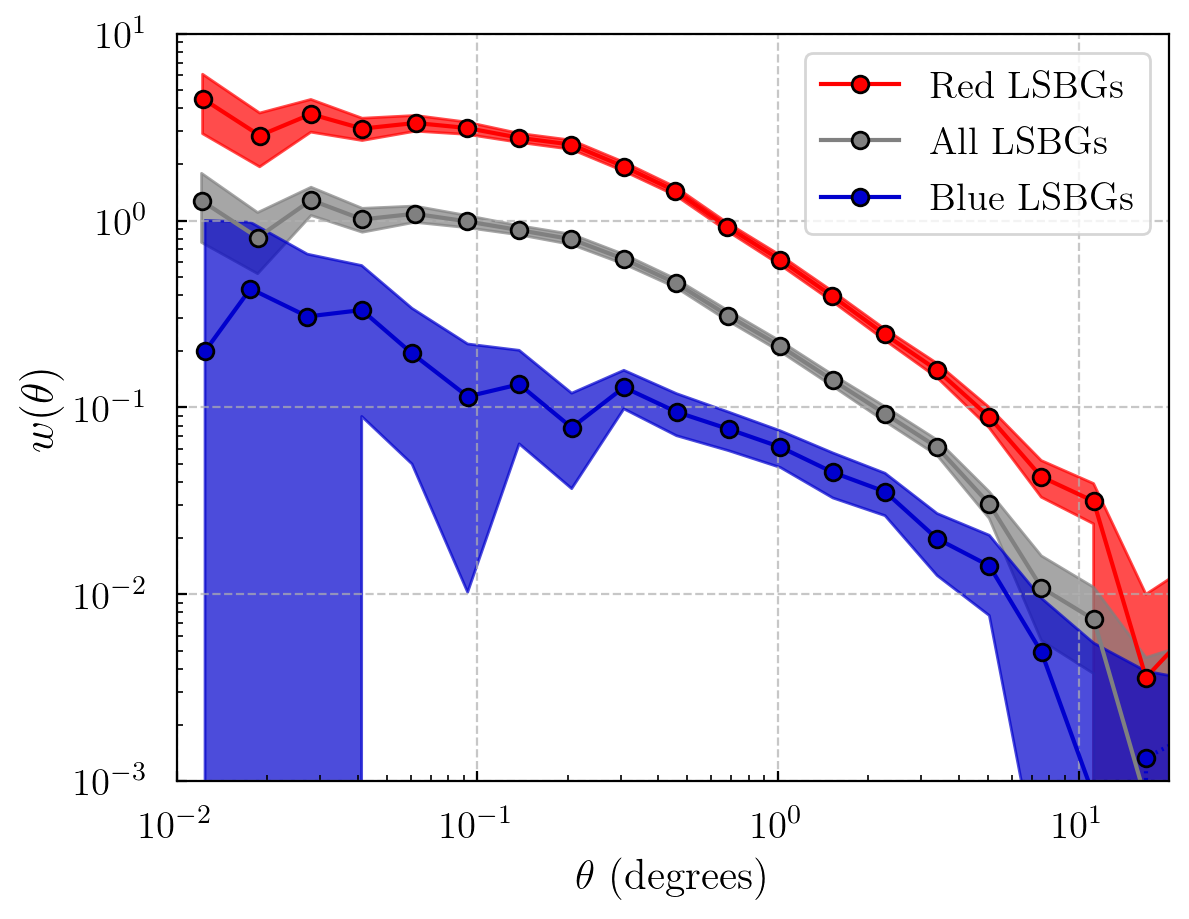

In [118]:
plt.figure(figsize = (6.,4.65))

# red galaxies
plt.plot(r_red, xi_red, color='r',marker='o', markeredgecolor='k', label='Red LSBGs')
plt.plot(r_red, -xi_red, color='r',marker='o', markeredgecolor='k', ls=':')
plt.fill_between(r_red, xi_red-Errors_red, xi_red+Errors_red, color='r', alpha=0.7)

# All galaxies
plt.plot(r_LSBG, xi_LSBG, color='gray',marker='o', markeredgecolor='k', label='All LSBGs')
plt.plot(r_LSBG, -xi_LSBG, color='gray',marker='o', markeredgecolor='k', ls=':')
plt.fill_between(r_LSBG, xi_LSBG-Errors_LSBG, xi_LSBG+Errors_LSBG, color='gray', alpha=0.7)


# blue galaxies
plt.plot(r_blue, xi_blue, color='mediumblue',marker='o', markeredgecolor='k', label='Blue LSBGs')
plt.plot(r_blue, -xi_blue, color='mediumblue',marker='o', markeredgecolor='k', ls=':')
plt.fill_between(r_blue, xi_blue-Errors_blue, xi_blue+Errors_blue, color='mediumblue', alpha=0.7)



# Low-z galaxies
#plt.plot(r, xi_low, color='g',marker='o', markeredgecolor='k', label=r'2MPZ low-$z$')
#plt.plot(r, -xi_low, color='g',marker='o', markeredgecolor='k', ls=':')
#plt.fill_between(r, xi_low-Errors_lowz, xi_low+Errors_lowz, color='g', alpha=0.7)

plt.grid(ls='--',alpha=0.7)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\theta$ (degrees)', fontsize=15)



plt.ylabel(r'$w(\theta)$', fontsize=16)
plt.legend(frameon=True, loc='upper right', fontsize=14)
plt.xlim([0.01,20]);plt.ylim(1.0e-3)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('two_point_color_blue.pdf', dpi=300)
plt.show()

## Part IV: Size - Luminosity relation

In this part, I present the size-luminosity relation for the LSB Galaxy sample.

I select all LSB galaxies that lie within 1 Mpc (physical scale) from the center of each association.

Define coordinates and redshifts/distances to the 9 most prominent peaks

In [119]:
# Right Ascension of the peaks
peaks_RA = [21.4200,55.04750,18.475833,9.888208,17.501667,54.616250,21.374583,16.929944,45.977000]

# Declination of the peaks
peaks_DEC = [-1.407222,-18.5875,-31.751944,3.138528,-45.922778,-35.448333,1.762778,-46.916526,-11.991806]

# Distance of the peaks in Mpc
peaks_dists = [75.07,23.41,84.80,62.61,106.61,18.97,73.32,102.03,57.03]

In [121]:
rad_to_deg = 180.0/np.pi

rad_1 = np.zeros(87)
mag_1 = np.zeros(87)
# ==========================
# ==========================
rad_2 = np.zeros(210)
mag_2 = np.zeros(210)
# ==========================
# ==========================
rad_3 = np.zeros(56)
mag_3 = np.zeros(56)
# ==========================
# ==========================
rad_4 = np.zeros(54)
mag_4 = np.zeros(54)
# ==========================
# ==========================
rad_5 = np.zeros(41)
mag_5 = np.zeros(41)
# ==========================
# ==========================
rad_6 = np.zeros(352)
mag_6 = np.zeros(352)
# ==========================
# ==========================
rad_7 = np.zeros(50)
mag_7 = np.zeros(50)
# ==========================
# ==========================
rad_8 = np.zeros(31)
mag_8 = np.zeros(31)
# ==========================
# ==========================
rad_9 = np.zeros(56)
mag_9 = np.zeros(56)

for i in range(9): # In the range of the peaks
    
    ra_pk = peaks_RA[i] # RA of the i-th peak
    dec_pk = peaks_DEC[i] # DEC of the i-th peak
    dist_pk = peaks_dists[i] # Distance of the i-th peak in Mpc
    
    
    # Create a box to select LSB galaxies
    ra_up = ra_pk+4.0
    ra_low = ra_pk-4.0
    dec_up = dec_pk+4.0
    dec_low = dec_pk-4.0
    
    box_LSB = (RA>ra_low)&(RA<ra_up)&(DEC>dec_low)&(DEC<dec_up)
    # Keep the LSB galaxies inside the box
    ra_lsb_pk = RA[box_LSB] # ra
    dec_lsb_pk = DEC[box_LSB] # dec
    R_eff_pk = R_eff[box_LSB] # Effective radius
    mag_g_pk = mag_g[box_LSB] # magnitude in the g band
    # =====================================================================
    # =====================================================================
    
    # Calculate now the angular extend of 1Mpc at the distance of the i-th peak
    ang_1mpc = rad_to_deg*(1.0/dist_pk)
    
    # Create object for the position of the peak
    C_pk = SkyCoord(ra=ra_pk*u.degree, dec=dec_pk*u.degree, frame='icrs')
    # Create object for the lsb galaxies
    C_lsb_pk = SkyCoord(ra=ra_lsb_pk*u.degree, dec=dec_lsb_pk*u.degree, frame='icrs')
    # =====================================================
    # Calculate angular separations
    sep_lsb_pk = C_lsb_pk.separation(C_pk).deg # Separation between peak and lsbs
    
    
    # Keep Effective radii and magnitudes with a separation less than 1.0 Mpc
    R_eff_1mpc = R_eff_pk[sep_lsb_pk<ang_1mpc]
    mag_g_1mpc = mag_g_pk[sep_lsb_pk<ang_1mpc]
    
    
    # Now estimate the physical radius (in pc) and the absolute magnitude 
    # of the LSB galaxies around the peak
    
    radius = R_eff_1mpc*dist_pk*(4.848)
    Abs_mag = mag_g_1mpc +5.0 - 5.0*np.log10(dist_pk*1.0e6)
    
    if (i==0):
        rad_1[:] = radius
        mag_1[:] = Abs_mag
    elif (i==1):
        rad_2[:] = radius
        mag_2[:] = Abs_mag
    elif (i==2):
        rad_3[:] = radius
        mag_3[:] = Abs_mag
    elif (i==3):
        rad_4[:] = radius
        mag_4[:] = Abs_mag
    elif (i==4):
        rad_5[:] = radius
        mag_5[:] = Abs_mag
    elif (i==5):
        rad_6[:] = radius
        mag_6[:] = Abs_mag
    elif (i==6):
        rad_7[:] = radius
        mag_7[:] = Abs_mag
    elif (i==7):
        rad_8[:] = radius
        mag_8[:] = Abs_mag
    elif (i==8):
        rad_9[:] = radius
        mag_9[:] = Abs_mag

If we want a relationship between absolute magnitude, surface brightness and effective radius (in pc), this is given by: 

\begin{equation}
R_p = (4.848\times 10^{-6}) \times 10^{\frac{5+\langle \mu \rangle - M -2.5\log 2\pi}{5}}
\end{equation}

In [161]:
M_mag = np.linspace(-18,8,500)

def R_arr(mu_mn):
    
    alpha = (5.0+mu_mn-M_mag-2.5*np.log10(2.0*np.pi))/5.0
    
    R_a = (4.848*1.0e-6)*(10.0**alpha)
    return R_a

R_arr_24 = R_arr(24.)
R_arr_25 = R_arr(25.)
R_arr_26 = R_arr(26.)
R_arr_27 = R_arr(27.)
R_arr_28 = R_arr(28.)

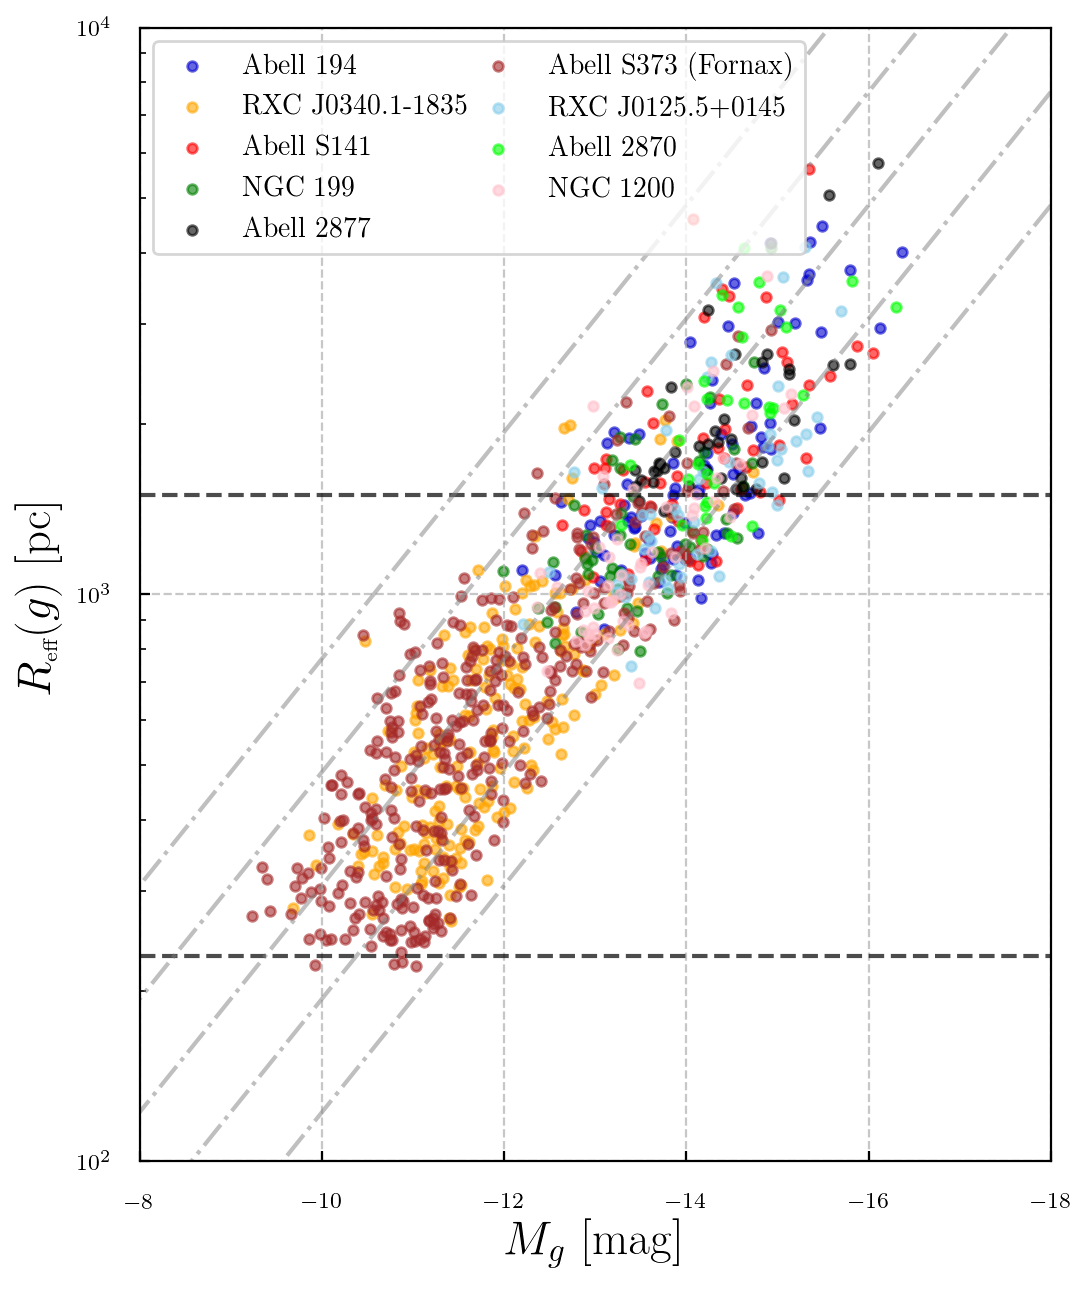

In [163]:
x_s = np.linspace(-8,-18,200)
y_s = 1839.33*np.ones(200)
y_s = 1500.0*np.ones(200)
y_s_2 = 229.91*np.ones(200)

plt.figure(figsize = (5.5,6.5))

plt.scatter(mag_1,rad_1, s=12.0, color='mediumblue', marker='o', alpha=0.6, label='Abell 194')
plt.scatter(mag_2,rad_2, s=12.0, color='orange',marker='o', alpha=0.6,label='RXC J0340.1-1835')
plt.scatter(mag_3,rad_3, s=12.0, color='red', marker='o', alpha=0.6,label='Abell S141')
plt.scatter(mag_4,rad_4, s=12.0, color='green', marker='o', alpha=0.6, label='NGC 199')
plt.scatter(mag_5,rad_5, s=12.0, color='black', marker='o', alpha=0.6,  label='Abell 2877')
plt.scatter(mag_6,rad_6, s=12.0, color='brown', marker='o', alpha=0.6,  label='Abell S373 (Fornax)')
plt.scatter(mag_7,rad_7, s=12.0, color='skyblue', marker='o', alpha=0.6, label='RXC J0125.5+0145')
plt.scatter(mag_8,rad_8, s=12.0, color='lime', marker='o', alpha=0.6, label='Abell 2870')
plt.scatter(mag_9,rad_9, s=12.0, color='pink', marker='o', alpha=0.6, label ='NGC 1200')

plt.plot(x_s,y_s, ls='--', color='k',alpha=0.7)
plt.plot(x_s,y_s_2, ls='--', color='k',alpha=0.7)
plt.plot(M_mag, R_arr_24, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_25, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_26, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_27, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_28, ls='-.',color='gray', alpha=0.5)

plt.yscale('log')
plt.ylim(1e2,1e4)
plt.xlim(-8,-18)
plt.grid(ls='--',alpha=0.7)


plt.xlabel('$M_g$ [mag]', fontsize=17)
plt.ylabel('$R_{\mbox{\scriptsize{eff}}}(g)$ [pc]', fontsize=17)

plt.legend(frameon=True, loc='upper left', fontsize=10, ncol=2,columnspacing=0.1)

plt.tight_layout()
plt.savefig('Size_Lumin.pdf')
plt.show()

In [141]:
print(len(rad_1[rad_1>1500]))
print(len(rad_2[rad_2>1500]))
print(len(rad_3[rad_3>1500]))
print(len(rad_4[rad_4>1500]))
print(len(rad_5[rad_5>1500]))
print(len(rad_6[rad_6>1500]))
print(len(rad_7[rad_7>1500]))
print(len(rad_8[rad_8>1500]))
print(len(rad_9[rad_9>1500]))

41
7
35
14
38
13
24
23
14


In [142]:
print(41+7+35+14+38+13+24+23+14)

209


In [143]:
print(len(rad_1)+len(rad_2)+len(rad_3)+len(rad_4)+len(rad_5)+len(rad_6)+len(rad_7)+len(rad_8)+len(rad_9))

937


In [144]:
print(209./937.)

0.223052294557


In [150]:
print(len(rad_1[rad_1>1500])/np.float(len(rad_1)))
print(len(rad_2[rad_2>1500])/np.float(len(rad_2)))
print(len(rad_3[rad_3>1500])/np.float(len(rad_3)))
print(len(rad_4[rad_4>1500])/np.float(len(rad_4)))
print(len(rad_5[rad_5>1500])/np.float(len(rad_5)))
print(len(rad_6[rad_6>1500])/np.float(len(rad_6)))
print(len(rad_7[rad_7>1500])/np.float(len(rad_7)))
print(len(rad_8[rad_8>1500])/np.float(len(rad_8)))
print(len(rad_9[rad_9>1500])/np.float(len(rad_9)))

0.471264367816
0.0333333333333
0.625
0.259259259259
0.926829268293
0.0369318181818
0.48
0.741935483871
0.25
